# DAT 402 Machine Learning Project 1

## Introduction

Using the *Adult* dataset, also known as *Census Income*, from UC Irvine, the goal of this notebook will be to predict the target variable "income" by using the other 14 predictor variables in the dataset and machine learning techniques. The variable "income" is categorical with two levels: <=50K or >50K.</br>
</br>
More on the dataset [here](https://archive.ics.uci.edu/dataset/2/adult "Visit UC Irvine").

## Import Packages

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# The following is code from UC Irvine's website for importing their dataset.
# I have commented out their print statements in favor of viewing the dataframe.

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
#print(adult.metadata)

# variable information
#print(adult.variables)

In [3]:
# For any referencing later should it be needed

X_unaltered = adult.data.features

## Data Exploration and Visualization

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
X.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [7]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Check the null counts

X.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [9]:
# Best check this one as well

y.isna().sum()

income    0
dtype: int64

In [10]:
for col in X.select_dtypes(include=['object']):
    print(col, '\n', X[col].unique(), '\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan] 

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan] 

relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex 
 ['Male' 'Female'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

In [11]:
for col in X.select_dtypes(include='object'):
    print(col, '\n', X[col].value_counts(), '\n')

workclass 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

education 
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

marital-status 
 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

occupation 
 Prof-specialty       6172
Craft-repair    

There are some '?' values in the 'workclass', 'occupation', and 'native-country' columns that will need to be dealt with. They will be replaced by np.nan since their values are unknown.
</br></br>

In [12]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

<Axes: >

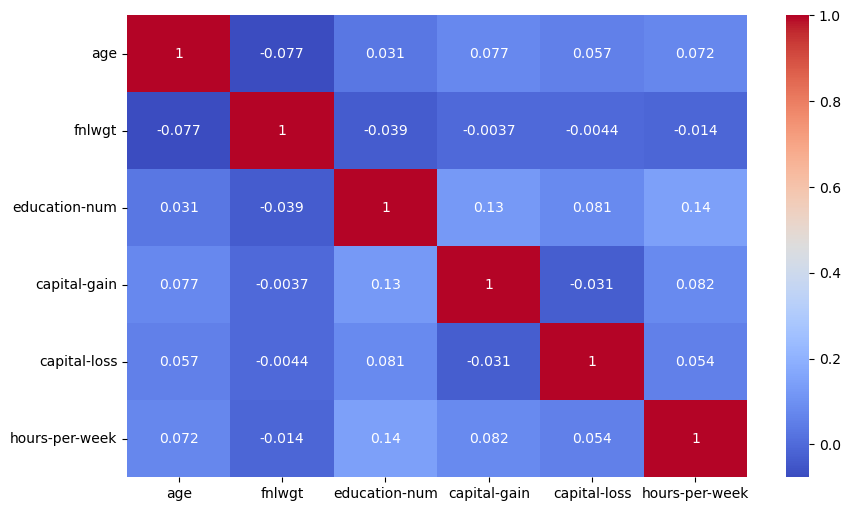

In [13]:
# View a heatmap of the correlations

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(X.corr(), cmap="coolwarm", annot=True, ax=ax)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

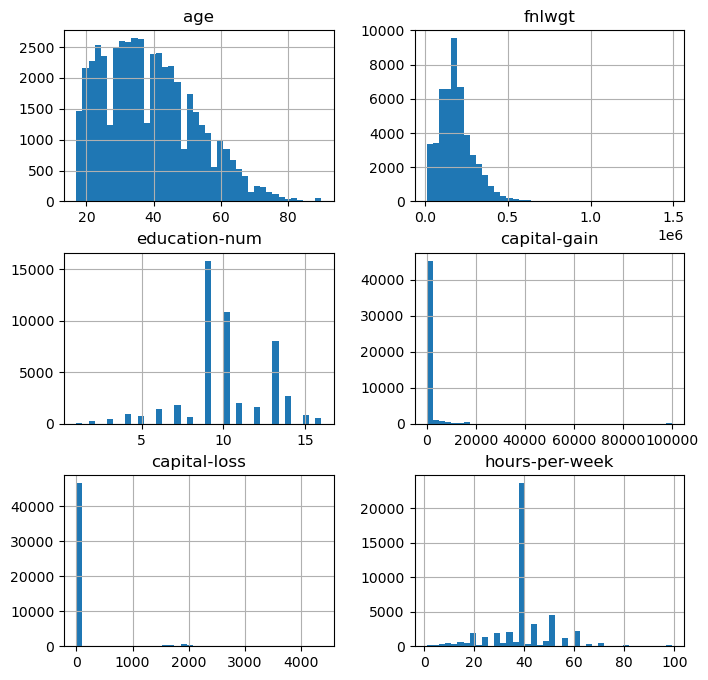

In [14]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

X.hist(bins=40, ax=ax1)

## Data Cleaning

In [15]:
# Column 'education' will not be needed as it comes ordinally encoded in the 'education-num' column

# First, preserve the education values and encoded pairings
education_index = X[['education', 'education-num']].drop_duplicates().sort_values(by='education-num').reset_index(drop=True)

# Drop
X = X.drop(columns='education')

In [16]:
# Replace '?' values with null values

for col in X[['workclass', 'occupation', 'native-country']]:
    X[col].replace('?', np.nan, inplace = True)

In [17]:
# Check the corrections

for col in X[['workclass', 'occupation', 'native-country']]:
    print(col,'\n',X[col].unique(),'\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands'] 



In [18]:
# Look at new null totals

X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

In [19]:
# Check proportion of dataset that is null

(len(X) - len(X.dropna())) / len(X)

0.07411653904426518

Null values represent about 7.4% of the observations in the dataset. It's a good portion of the data, but not overwhelming. For my own curiosity, I want to model the data both by imputing the nulls and by dropping them to see how model performance changes.
</br></br>

In [20]:
# Create a second dataframe where nulls will be dropped

X2 = adult.data.features
X2['income'] = adult.data.targets

for col in X2[['workclass', 'occupation', 'native-country']]:
    X2[col].replace('?', np.nan, inplace = True)
    
X2 = X2.dropna()

y2 = pd.DataFrame(X2['income'])

X2 = X2.drop(columns=['income', 'education'])

print(X2.shape)
print(y2.shape)

(45222, 13)
(45222, 1)


In [21]:
# Remove the trailing periods

y['income'] = y['income'].str.rstrip('.')
y2['income'] = y2['income'].str.rstrip('.')

print(y['income'].unique())
print(y2['income'].unique())

['<=50K' '>50K']
['<=50K' '>50K']


In [22]:
y['income'] = y['income'].map({'<=50K': 0, '>50K': 1})
y2['income'] = y2['income'].map({'<=50K': 0, '>50K': 1})

## Imputation

I could not get OrdinalEncoder's inverse_transform() to work over multiple columns for me. So, I built my own function to do it using dictionaries.

In [23]:
def encode_impute_decode(df):
    
    categorical_label_mappings = {}

    for col in df.select_dtypes(include='object'):
        unique_values = df[col].unique()
        mapping = {value: index + 1 if not pd.isna(value) else value for index, value in enumerate(unique_values)}
        categorical_label_mappings[col] = mapping
        df[col] = df[col].map(mapping)
        
    df_encoded = df.copy()

    knn_imputer = KNNImputer(n_neighbors=5)
    df_encoded_imputed = pd.DataFrame(np.round(knn_imputer.fit_transform(df_encoded)), columns=df_encoded.columns)

    for col, mapping in categorical_label_mappings.items():
        reverse_mapping = {value: key for key, value in mapping.items()}
        df_encoded_imputed[col] = df_encoded_imputed[col].map(reverse_mapping)

    return df_encoded_imputed

In [24]:
X = encode_impute_decode(X)
X.isna().sum()

age                0
workclass          1
fnlwgt             0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country    14
dtype: int64

In [25]:
# Imperfect cleanup, run it again

X = encode_impute_decode(X)
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [26]:
X_unaltered['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [27]:
X['occupation'].value_counts()

Prof-specialty       6685
Craft-repair         6497
Exec-managerial      6140
Sales                6140
Other-service        5702
Adm-clerical         5613
Machine-op-inspct    3025
Transport-moving     2495
Handlers-cleaners    2326
Farming-fishing      1532
Tech-support         1447
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
for col in X[['workclass', 'occupation', 'native-country']]:
    print(col,'\n',X[col].unique(),'\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' 'Germany' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands'] 



## Build Transformer

In [29]:
# Retrieve variable names for numeric and categorical separately
numeric_vars = X.select_dtypes(include=[np.number]).columns.to_list()
categorical_vars = X.select_dtypes(include='object').columns.to_list()

# Make numeric and categorical pipelines
numeric_pipe = make_pipeline(StandardScaler())

categorical_pipe = make_pipeline(OneHotEncoder(handle_unknown="ignore", sparse_output=False))

# Create transformer
preprocessing = ColumnTransformer([
    ("Numeric", numeric_pipe, numeric_vars),
    ("Categorical", categorical_pipe, categorical_vars)])

preprocessing

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['workclass', 'marital-status', 'occupation',
                                  'relationship', 'race', 'sex',
                                  'native-country'])])

In [30]:
prepared = preprocessing.fit_transform(X)

X_prepared = pd.DataFrame(prepared,
                         columns = preprocessing.get_feature_names_out(),
                         index = X.index)

X_prepared

,Numeric__age,Numeric__fnlwgt,Numeric__education-num,Numeric__capital-gain,Numeric__capital-loss,Numeric__hours-per-week,Categorical__workclass_Federal-gov,Categorical__workclass_Local-gov,Categorical__workclass_Never-worked,Categorical__workclass_Private,...,Categorical__native-country_Portugal,Categorical__native-country_Puerto-Rico,Categorical__native-country_Scotland,Categorical__native-country_South,Categorical__native-country_Taiwan,Categorical__native-country_Thailand,Categorical__native-country_Trinadad&Tobago,Categorical__native-country_United-States,Categorical__native-country_Vietnam,Categorical__native-country_Yugoslavia
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,0.243884,1.136512,-0.144804,-0.217127,-0.356894,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,1.849433,1.247492,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,-0.046942,1.754865,1.136512,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.390683,-1.001612,1.136512,0.587220,-0.217127,-0.034087,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
prepared2 = preprocessing.fit_transform(X2)

X2_prepared = pd.DataFrame(prepared2,
                         columns = preprocessing.get_feature_names_out(),
                         index = X2.index)

X2_prepared

,Numeric__age,Numeric__fnlwgt,Numeric__education-num,Numeric__capital-gain,Numeric__capital-loss,Numeric__hours-per-week,Categorical__workclass_Federal-gov,Categorical__workclass_Local-gov,Categorical__workclass_Private,Categorical__workclass_Self-emp-inc,...,Categorical__native-country_Portugal,Categorical__native-country_Puerto-Rico,Categorical__native-country_Scotland,Categorical__native-country_South,Categorical__native-country_Taiwan,Categorical__native-country_Thailand,Categorical__native-country_Trinadad&Tobago,Categorical__native-country_United-States,Categorical__native-country_Vietnam,Categorical__native-country_Yugoslavia
0,0.034201,-1.062295,1.128753,0.142888,-0.21878,-0.078120,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.866417,-1.007438,1.128753,-0.146733,-0.21878,-2.326738,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.041455,0.245284,-0.438122,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.093385,0.425853,-1.221559,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.798015,1.407393,1.128753,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.419735,0.525154,1.128753,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48837,0.034201,0.243135,1.128753,-0.146733,-0.21878,-0.411249,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,-0.041455,1.753613,1.128753,-0.146733,-0.21878,0.754701,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,0.412481,-1.001947,1.128753,0.579985,-0.21878,-0.078120,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_prepared, y2, test_size=.2, random_state=42)

print(X_train.shape)
print(X_train2.shape)

(39073, 89)
(36177, 88)


## Modeling

In [ ]:
def plot_roc(y_truth, y_prob, ax, title):

    FPR, TPR, thresholds = roc_curve(y_truth, y_prob)

    ax.step(FPR, TPR, linewidth=2)
    ax.plot([0,1], [0,1], '--', color = 'black')

    fs = 10
    ax.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
    ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

    AUC = np.trapz(TPR, FPR)
    ax.set_title(title + ', AUC = ' + str(round(AUC,4)))
    
y_probas_train = model.predict_proba(X_train_prepared)
y_probas_test = model.predict_proba(X_test_prepared)

fig1, ax1 = plt.subplots(1, 2, figsize=(11,5))

plot_roc(y_train_int, y_probas_train[:,1], ax1[0], 'Training Data')
plot_roc(y_test_int, y_probas_test[:,1], ax1[1], 'Testing Data')

In [ ]:
def plot_pr(y_truth, y_prob, ax, title):

    precisions, recalls, thresholds = precision_recall_curve(y_truth, y_prob)

    ax.step(recalls, precisions, linewidth=2)
    ax.grid()

    fs = 10
    ax.set_xlabel('Recall (Sensitivity)', fontsize=fs)
    ax.set_ylabel('Precision (PPV)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=fs)

    ax.set_title('Precision-Recall Curve, ' + title)
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1])

fig1, ax1 = plt.subplots(1, 2, figsize=(11,5))

plot_pr(y_train_int, y_probas_train[:,1], ax1[0], 'Training Data')
plot_pr(y_test_int, y_probas_test[:,1], ax1[1], 'Testing Data')

In [33]:
def model_evaluation(models, X_train, y_train, X_test, y_test):
    
    y_test_enc = LabelEncoder().fit_transform(y_test)
    
    for model in models:
        
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        
        cm = confusion_matrix(preds, y_test_enc)
        acc = accuracy_score(preds, y_test_enc)
        prec = precision_score(y_test_enc, preds)
        rec = recall_score(y_test_enc, preds)
        
        print('Model:',model,'\n')
        print('Confusion Matrix:\n',cm,'\n')
        print(f'Accuracy: {acc:.6f}; Precision: {prec:.6f}; Recall: {rec:.6f}\n')

In [42]:
lr = LogisticRegression()
svc = LinearSVC(C=100, loss="hinge", random_state=42)
svc2 = SVC(kernel='poly', degree=3, gamma='scale', coef0=1, C=5, random_state=42)
rf = RandomForestClassifier(random_state=42)

models = [lr, svc, svc2, rf]

In [43]:
model_evaluation(models, X_train, y_train, X_test, y_test)

Model: LogisticRegression() 

Confusion Matrix:
 [[6927  970]
 [ 487 1385]] 

Accuracy: 0.850855; Precision: 0.739850; Recall: 0.588110

Model: LinearSVC(C=100, loss='hinge', random_state=42) 

Confusion Matrix:
 [[7199 1516]
 [ 215  839]] 

Accuracy: 0.822807; Precision: 0.796015; Recall: 0.356263

Model: SVC(C=100, coef0=1, kernel='poly', random_state=42) 

Confusion Matrix:
 [[6841  965]
 [ 573 1390]] 

Accuracy: 0.842563; Precision: 0.708100; Recall: 0.590234

Model: RandomForestClassifier(random_state=42) 

Confusion Matrix:
 [[6918  932]
 [ 496 1423]] 

Accuracy: 0.853823; Precision: 0.741532; Recall: 0.604246



In [36]:
model_evaluation(models, X_train2, y_train2, X_test2, y_test2)

Model: LogisticRegression() 

Confusion Matrix:
 [[6312  902]
 [ 433 1398]] 

Accuracy: 0.852405; Precision: 0.763517; Recall: 0.607826

Model: LinearSVC(C=100, loss='hinge', random_state=42) 

Confusion Matrix:
 [[6533 1335]
 [ 212  965]] 

Accuracy: 0.828966; Precision: 0.819881; Recall: 0.419565

Model: SVC(C=10, coef0=1, kernel='poly', random_state=42) 

Confusion Matrix:
 [[6314  926]
 [ 431 1374]] 

Accuracy: 0.849972; Precision: 0.761219; Recall: 0.597391

Model: RandomForestClassifier(random_state=42) 

Confusion Matrix:
 [[6279  844]
 [ 466 1456]] 

Accuracy: 0.855169; Precision: 0.757544; Recall: 0.633043



In [37]:
rf.feature_importances_

array([1.54486521e-01, 1.74469322e-01, 1.08180386e-01, 1.01734078e-01,
       3.26784734e-02, 8.19714228e-02, 4.67523651e-03, 4.91012294e-03,
       9.03304965e-03, 6.02852657e-03, 7.74550737e-03, 4.02838718e-03,
       1.20135385e-04, 6.03826214e-03, 3.35410358e-04, 6.40090117e-02,
       7.84046772e-04, 2.73540087e-02, 1.44765362e-03, 1.66898491e-03,
       4.93099860e-03, 3.91338219e-05, 6.30662548e-03, 1.75337536e-02,
       4.74638968e-03, 3.22277766e-03, 4.10870775e-03, 6.96685550e-03,
       1.45148745e-04, 1.51010537e-02, 2.55788683e-03, 6.22209561e-03,
       3.99289999e-03, 4.16312438e-03, 3.95922780e-02, 1.15707145e-02,
       1.58586067e-03, 7.92389248e-03, 4.95502177e-03, 9.45099009e-03,
       1.11506249e-03, 2.67268624e-03, 4.29179022e-03, 7.86012683e-04,
       5.33919730e-03, 7.43601401e-03, 9.53818106e-03, 2.56071379e-04,
       1.28098658e-03, 5.31523324e-04, 1.68910133e-04, 7.01698187e-04,
       2.76685002e-04, 1.75189616e-04, 2.43275539e-04, 8.27288491e-04,
      

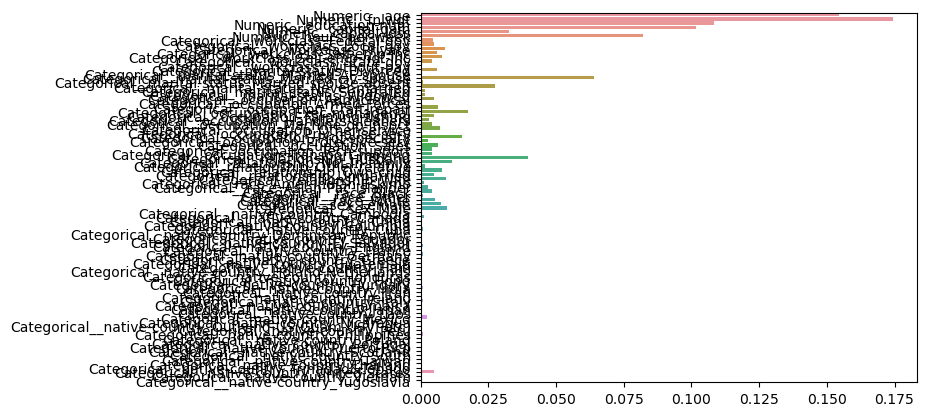

In [38]:
sns.barplot(x=rf.feature_importances_, y=X_train2.columns, fontsize=2)
plt.show()

In [39]:
threshold = 0.005

# Create a boolean mask of features that meet the threshold
selected_features_mask = np.array(rf.feature_importances_ > threshold)

# Use the mask to filter the feature names
selected_feature_names = np.array(rf.feature_names_in_)[selected_features_mask]

# Convert the selected feature names to a Python list
selected_feature_names_list = selected_feature_names.tolist()

In [40]:
selected_feature_names_list

['Numeric__age',
 'Numeric__fnlwgt',
 'Numeric__education-num',
 'Numeric__capital-gain',
 'Numeric__capital-loss',
 'Numeric__hours-per-week',
 'Categorical__marital-status_Married-civ-spouse',
 'Categorical__marital-status_Never-married',
 'Categorical__occupation_Exec-managerial',
 'Categorical__occupation_Prof-specialty',
 'Categorical__relationship_Husband']

In [41]:
model_evaluation(models, X_train2[selected_feature_names_list], y_train2, X_test2[selected_feature_names_list], y_test2)

Model: LogisticRegression() 

Confusion Matrix:
 [[6301  966]
 [ 444 1334]] 

Accuracy: 0.844113; Precision: 0.750281; Recall: 0.580000

Model: LinearSVC(C=100, loss='hinge', random_state=42) 

Confusion Matrix:
 [[6222  961]
 [ 523 1339]] 

Accuracy: 0.835931; Precision: 0.719119; Recall: 0.582174

Model: SVC(C=10, coef0=1, kernel='poly', random_state=42) 

Confusion Matrix:
 [[6395 1016]
 [ 350 1284]] 

Accuracy: 0.848977; Precision: 0.785802; Recall: 0.558261

Model: RandomForestClassifier(random_state=42) 

Confusion Matrix:
 [[6170  868]
 [ 575 1432]] 

Accuracy: 0.840464; Precision: 0.713503; Recall: 0.622609

